# Roberto Ramirez
MCD 

Mayo 2023

El objetivo de este notebook es experimentar con las capacidades de SARIMAX para generar predicciones, y de igual manera medirlas con MAPE. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import itertools

# Read the data from the CSV file
data = pd.read_csv('datos_fecha.csv')
data['fecha'] = data['fecha'].dropna()
data = data[data['zona_geografica'] == 'AMG']
data = data[data['delito'] == 'Robo a persona']
#data = data[data['colonia'] == 'ZONA CENTRO']
#data = data[data['hora'] != 'N.D.']
# Group the data on a weekly basis
data
#######

# Convert 'fecha' column to datetime format
data['fecha'] = pd.to_datetime(data['fecha'], format='%m/%d/%Y')

# Set 'fecha' column as the index
data.set_index('fecha', inplace=True)

# Group by weekly intervals and count occurrences of each event type
weekly_counts = data.resample('W').count()
weekly_counts = weekly_counts.reset_index()
weekly_counts

data = weekly_counts
data.set_index('fecha', inplace=True)
data

,delito,x,y,colonia,municipio,clave_mun,hora,bien_afectado,zona_geografica
fecha,,,,,,,,,
2020-01-05,132,122,122,132,132,132,132,132,132
2020-01-12,314,298,298,314,314,314,314,314,314
2020-01-19,263,247,247,263,263,263,263,263,263
2020-01-26,230,214,214,230,230,230,230,230,230
2020-02-02,227,220,220,227,227,227,227,227,227
...,...,...,...,...,...,...,...,...,...
2023-03-05,111,111,111,111,111,111,111,111,111
2023-03-12,135,135,135,135,135,135,135,135,135
2023-03-19,137,135,135,137,137,137,137,137,137


C:\Users\Rob_DS\anaconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Rob_DS\anaconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Rob_DS\anaconda3\envs\datascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Rob_DS\anaconda3\envs\datascience\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fai

12.95138377957675


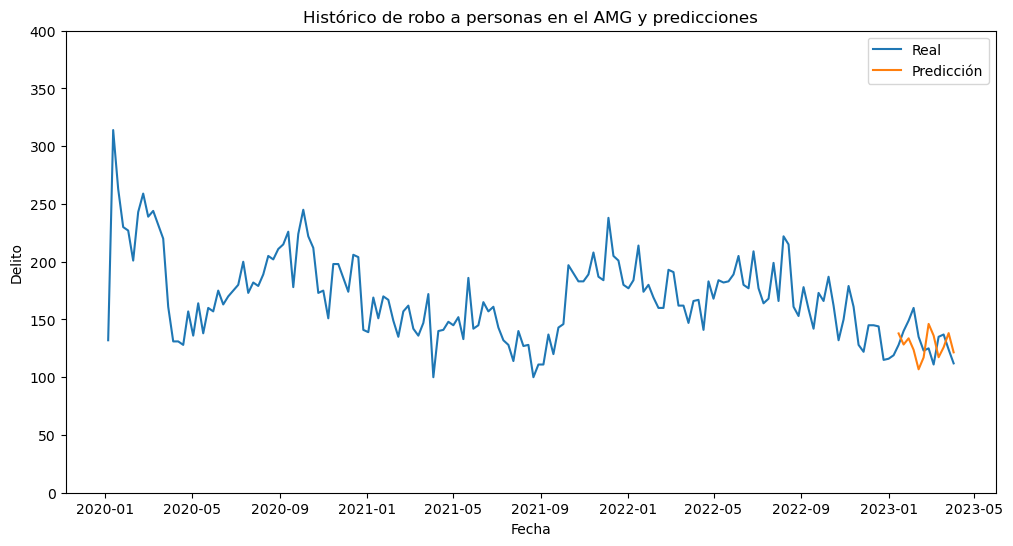

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             delito   No. Observations:                  158
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 52)   Log Likelihood                -509.435
Date:                            Tue, 23 May 2023   AIC                           1032.870
Time:                                    20:33:57   BIC                           1051.515
Sample:                                01-05-2020   HQIC                          1040.427
                                     - 01-08-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9312      0.048     19.590      0.000       0.838       1.024
ma.L1         -0.5072      0.114     -4.455      0.000      -0.730      -0.284
ma.L2          0.0497      0.109      0.455      0.649      -0.164       0.264
ar.S.L52      -0.8562     70.727     -0.012      0.990    -139.478     137.765
ma.S.L52       0.5470     84.756      0.006      0.995    -165.571     166.665
ma.S.L104     -0.0711     36.468     -0.002      0.998     -71.547      71.405
sigma2       764.9557   1.02e+04      0.075      0.940   -1.93e+04    2.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                40.53
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -0.36
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
train_data = data.iloc[:-12]  # Train on all data except the last 10 WEEKS
test_data = data.iloc[-12:]  # Last 7 days for testing

# Fit SARIMA model
model = sm.tsa.SARIMAX(train_data['delito'], order=(1, 0, 2), seasonal_order=(1, 1, 2, 52))
results = model.fit()

# Make predictions
forecast = results.get_forecast(steps=len(test_data))  # Adjust 'steps' as needed
predicted_mean = forecast.predicted_mean

# Get actual values from the test set
actual_values = test_data['delito']

mape = (abs(actual_values - predicted_mean) / actual_values).mean() * 100
print(mape)

# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['delito'], label='Real')
plt.plot(predicted_mean.index, predicted_mean, label='Predicción')
plt.ylim(0, 400)
plt.xlabel('Fecha')
plt.ylabel('Delito')
plt.title('Histórico de robo a personas en el AMG y predicciones')
plt.legend()
plt.show()


results.summary()

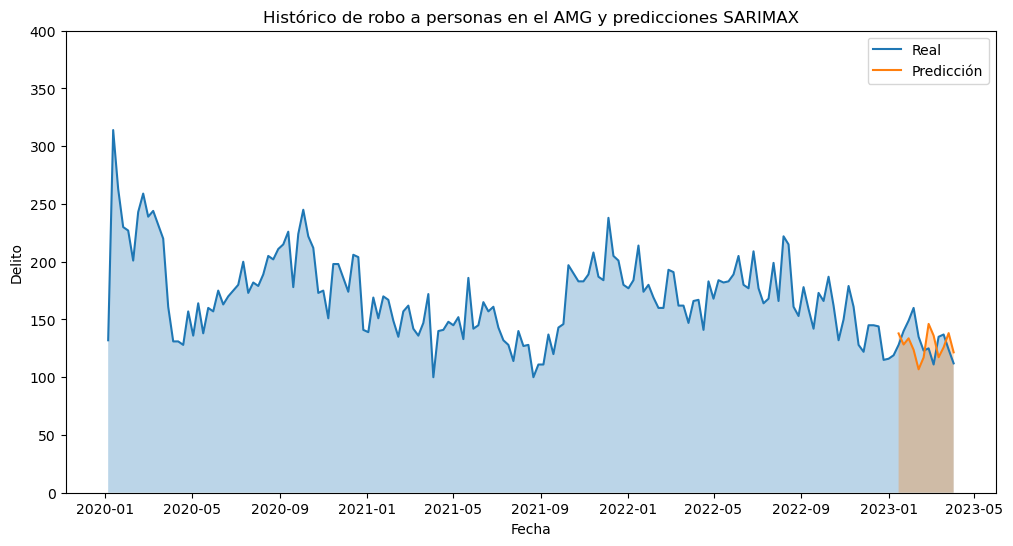

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot actual values
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y='delito', label='Real')
sns.lineplot(data=predicted_mean, x=predicted_mean.index, y=predicted_mean, label='Predicción')
plt.fill_between(data.index, 0, data['delito'], alpha=0.3)# Fill area below the line with color
plt.fill_between(predicted_mean.index, 0, predicted_mean, alpha=0.3)# Fill area below the line with color
plt.ylim(0, 400)
plt.xlabel('Fecha')
plt.ylabel('Delito')
plt.title('Histórico de robo a personas en el AMG y predicciones SARIMAX')
plt.legend()
plt.show()

In [94]:
#Dickey-Fuler Test came out as we're positive it is stationary

from statsmodels.tsa.stattools import adfuller

# Assuming your data is a pandas Series
data_series = data['delito']

# Perform Dickey-Fuller test
result = adfuller(data_series)

# Extract test statistics and p-value
test_statistic = result[0]
p_value = result[1]

# Print test results
print("Test Statistic:", test_statistic)
print("P-value:", p_value)

Test Statistic: -3.0126783668455803
P-value: 0.033727244322374506
